## <b>Project Description:</b>


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

Dataset Link-  
•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv
 </em></b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows: 7043
No. of Columns: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# As we have 31 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

#### Observation :
-  7043 Rows and 21 Columns in this Telecom Dataset.
- <b> Target Variable 'Churn' with object datatype which signifies classification problem.</b>
- <b> We have entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we will convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [5]:
df.drop(['customerID'],axis=1,inplace=True)

df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [6]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis

<b> Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [7]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

22

<b> We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset. </b>

In [8]:
df.drop_duplicates(keep='last',inplace= True)

In [9]:
df.shape

(7021, 20)

#### Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype .

In [10]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b> There is possibility of whitespaces in TotalCharges column. lets deal with it.</b>

In [11]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [12]:
# Replace Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [13]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

<b> We have remove whitespaces so let now check for missing values</b>

In [14]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

We can impute missing value in TotalCharges either with mean and median. 

We can decide imputation method after checking distribution and Outliers in data

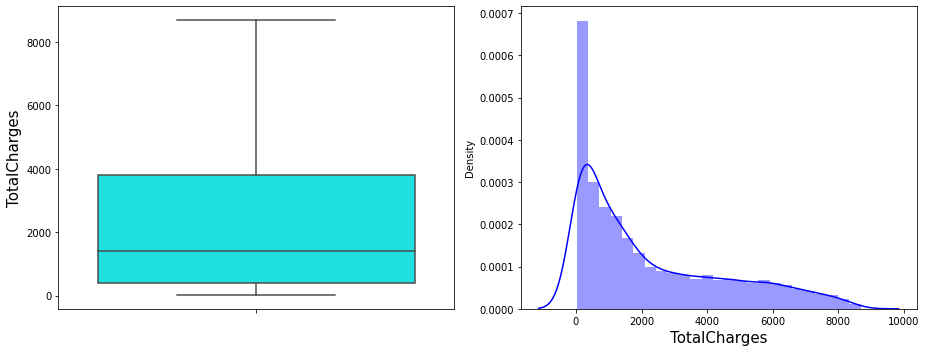

In [15]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [17]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### Checking for Null values after Imputation

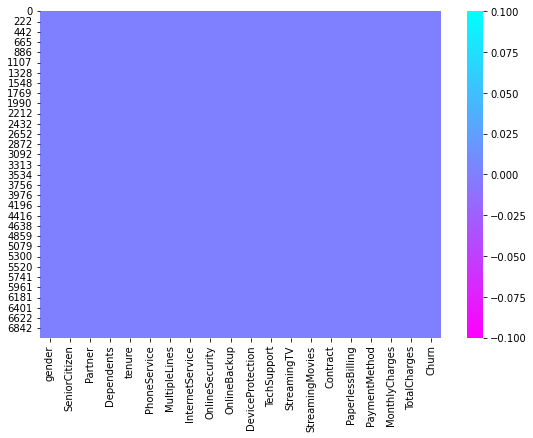

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Observation :
 No Missing Value is Present.


### Statistical Matrix

In [19]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.000000,0.162512,0.368947,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [20]:
df[Categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0


#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.

#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [21]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

##  Churn Target Variable

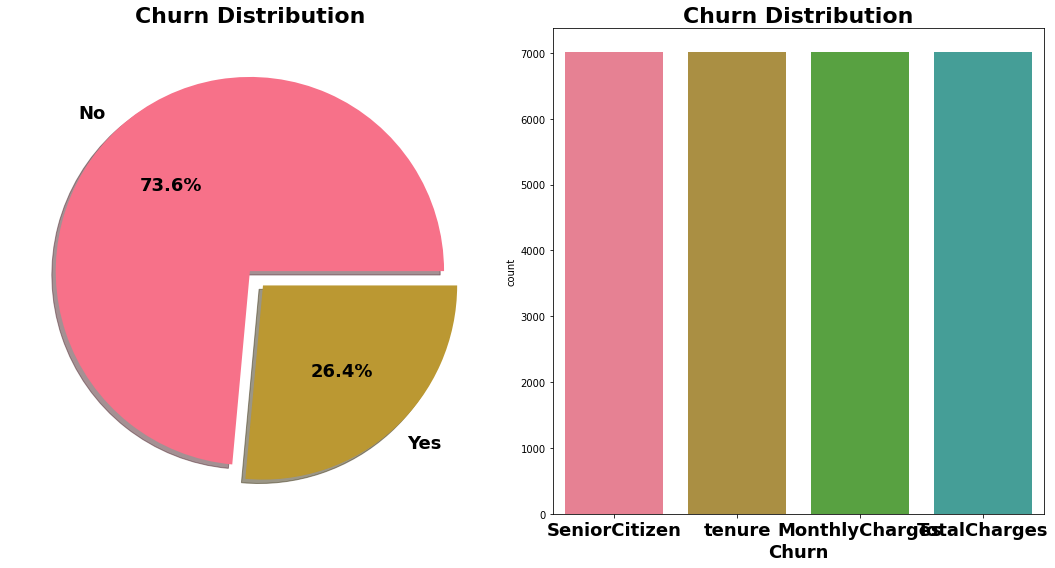

In [22]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

<b> Will explore Independent feature to figure where customer are unstatisfied and what does customers need or inclination in cutting edge competition.</b> 

### Gender vs Churn : Can we exist any trend between gender & churn or any impact of gender on Churn?

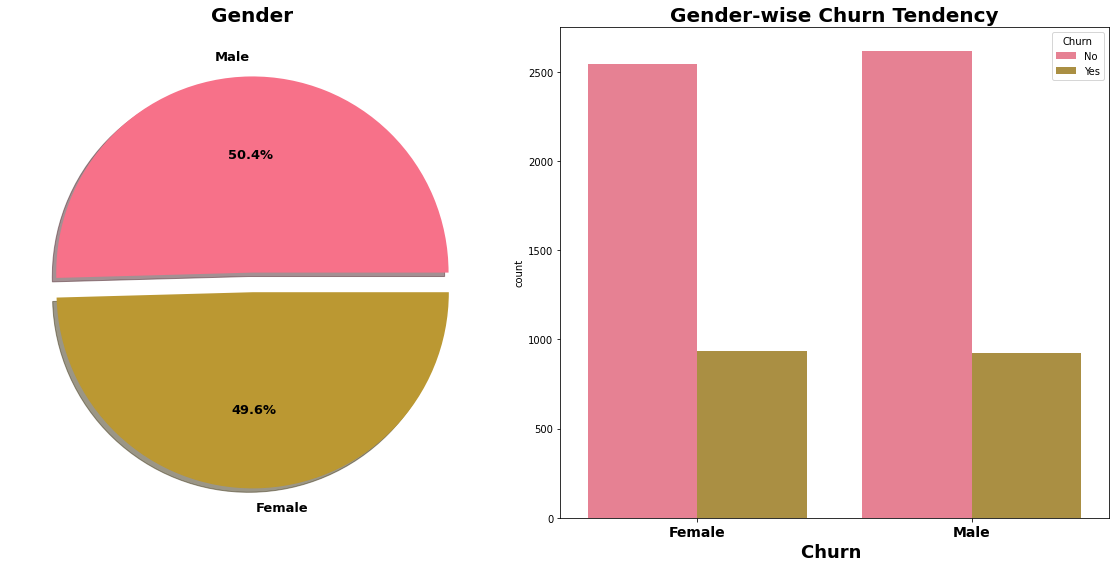

In [23]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

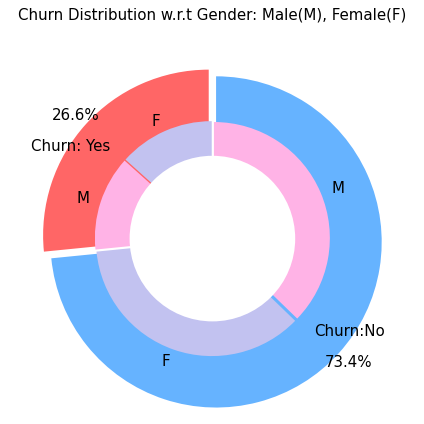

In [24]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Observation :
- Data has both gender almost in same proportion with minor difference.
- Both genders have tendency of attrition in same percentage.

### We need to  check Senior Citizen vs Gender Wise Churn Tendency

 Lets see how many of them are Senior Citizen and Churn tendency in senior citizen

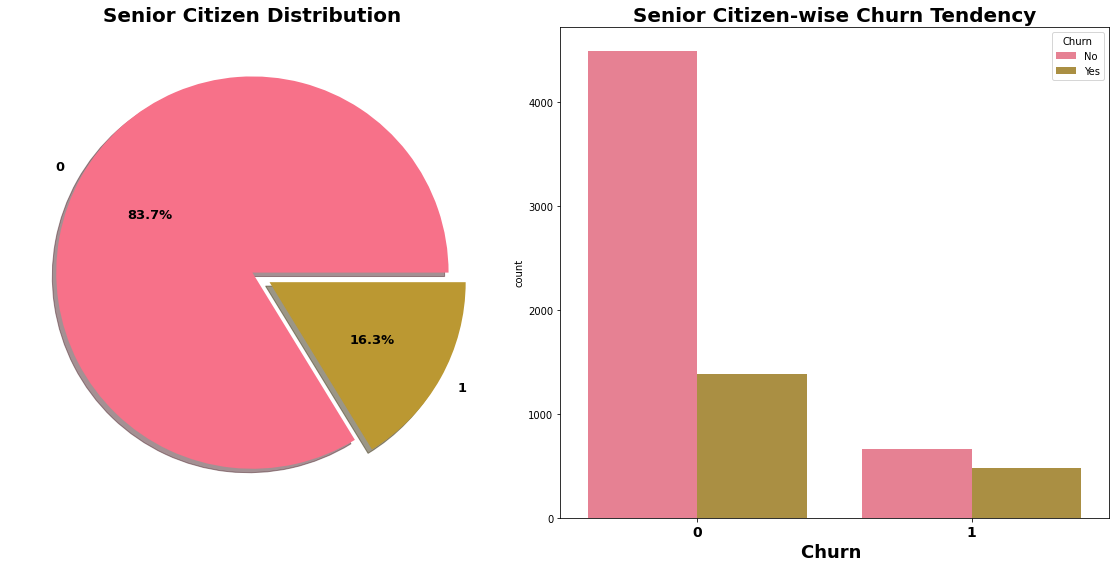

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

 <b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [26]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

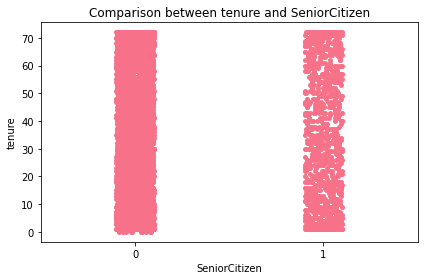

In [27]:
# Compare tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

### Effect of Partner and Dependents on Churn

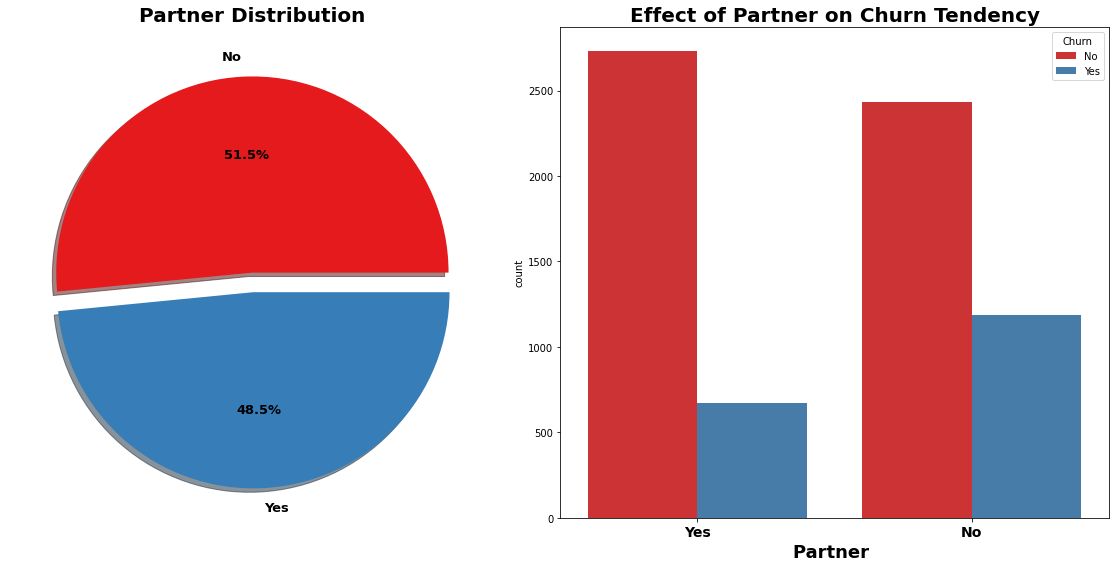

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

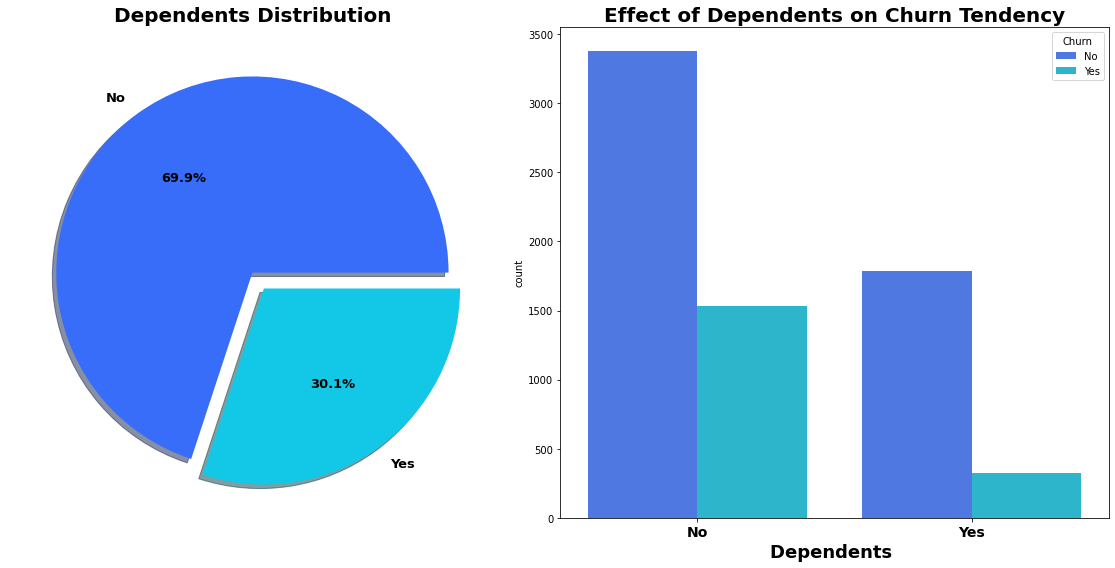

In [29]:
# plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Observation-

- Customer having Partner have less tendency to Churn.

- Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%

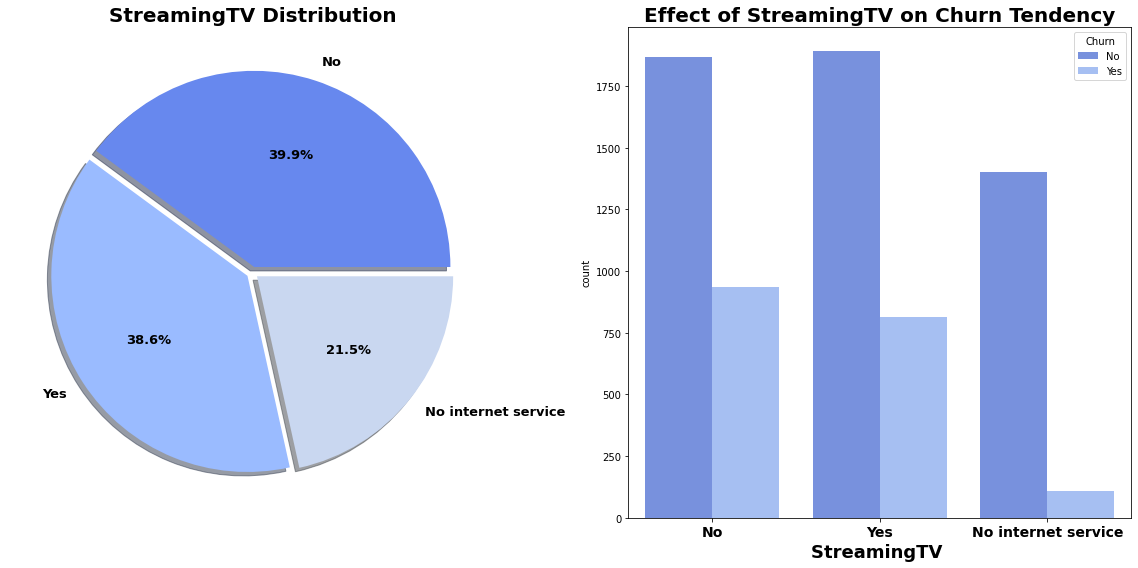

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

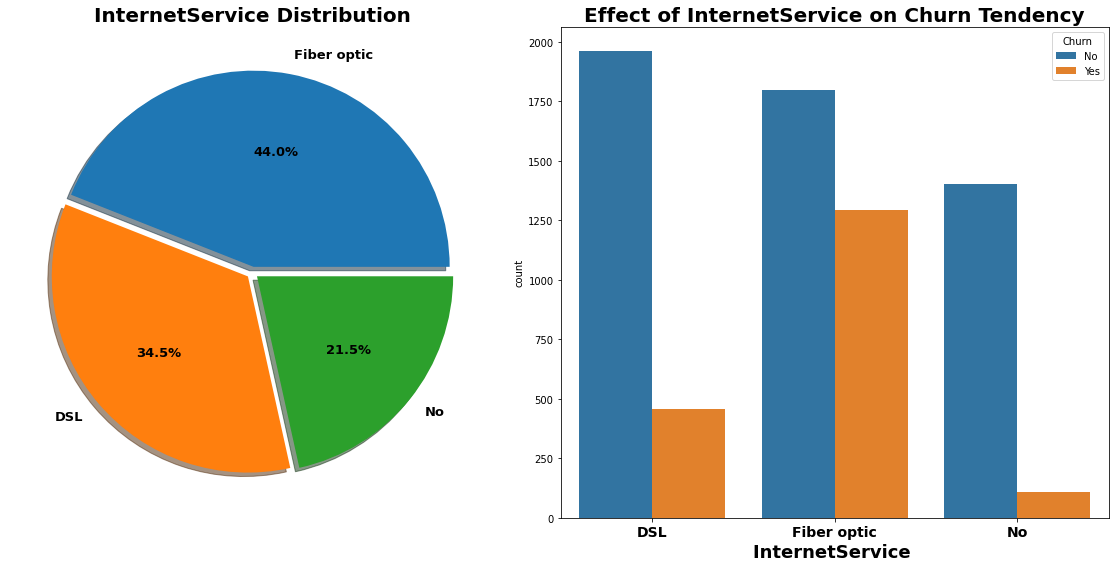

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

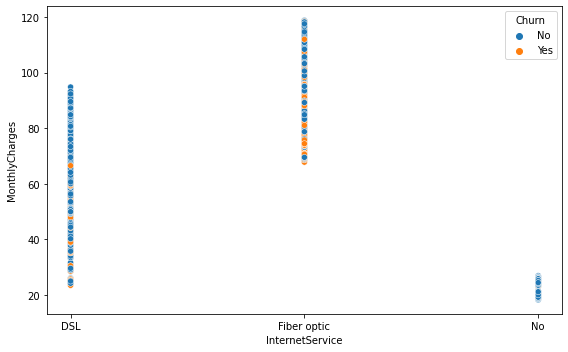

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

    44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.

    We can find high monthly charges among customer using fiber optic compare to DSL. 

    We can conclude that High charges is reason of customer churn.

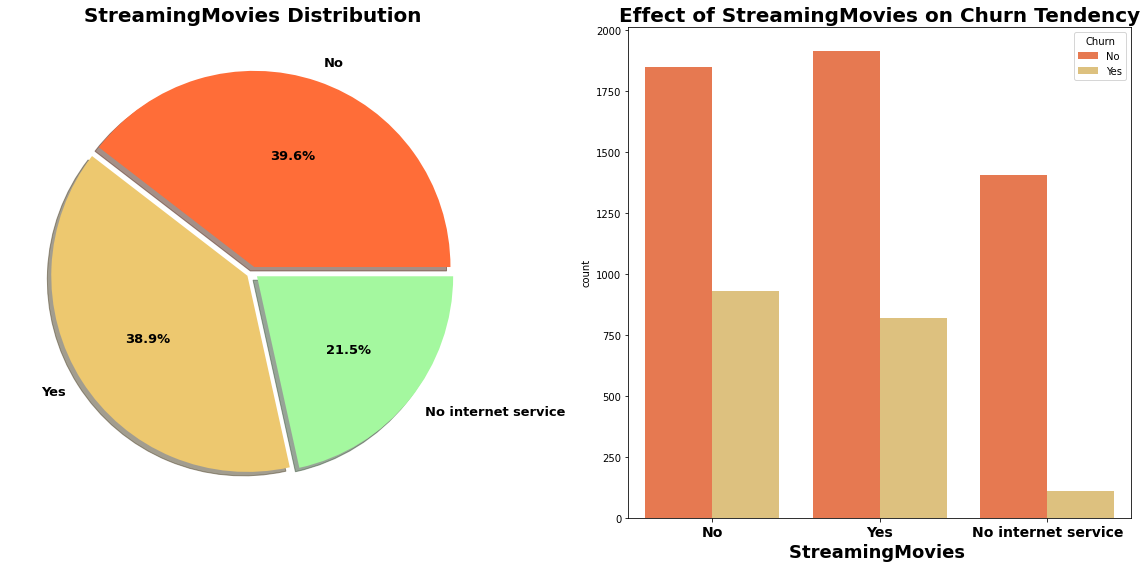

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

**Almost same churn tendency in people streaming movies and not.**

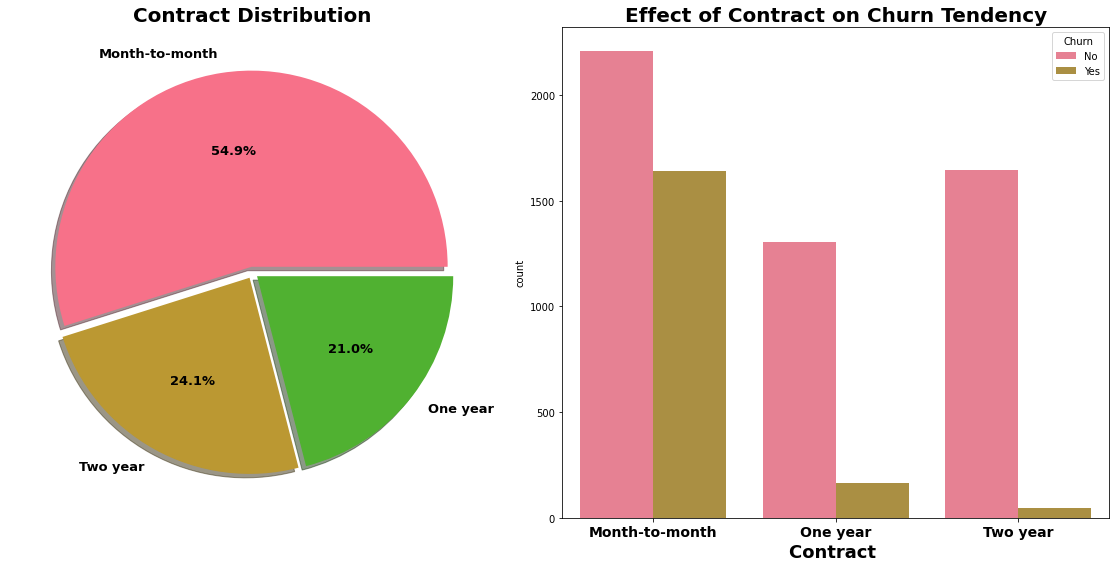

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

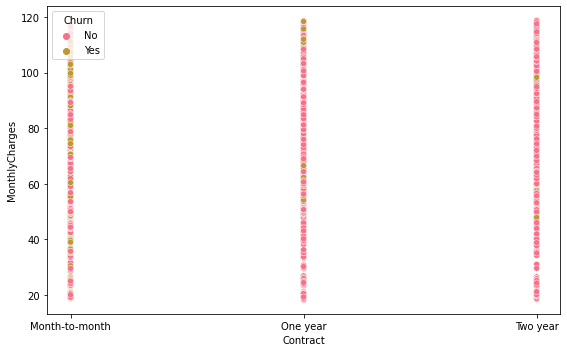

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

 Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.

 We did not find any relation between Monthly charges and contract tenure.

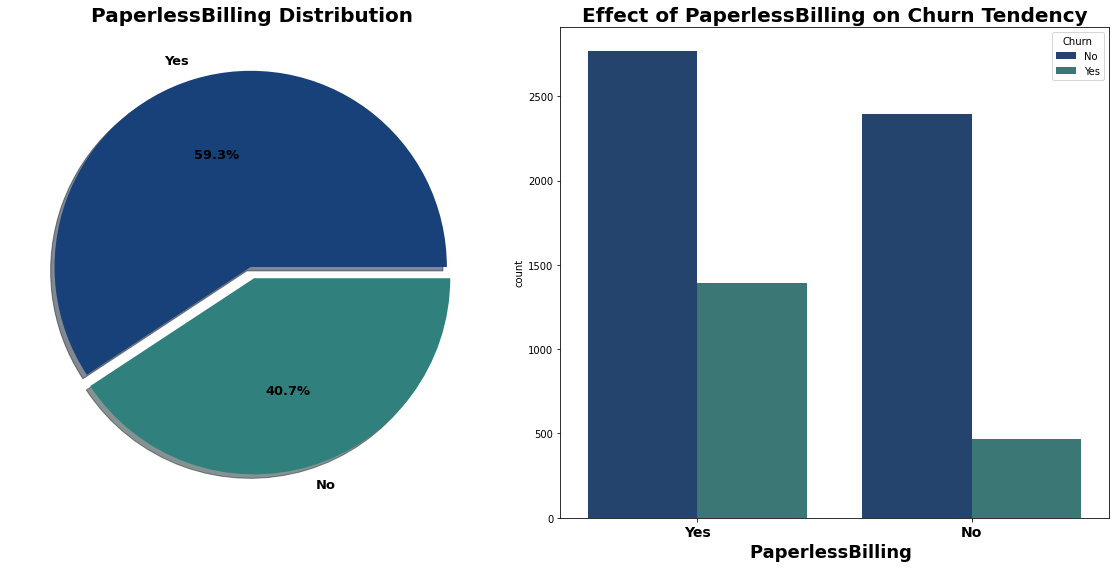

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

 60% Customer perfer paperless billing.

 The customers who prefer paperless billing they have high churn rate.

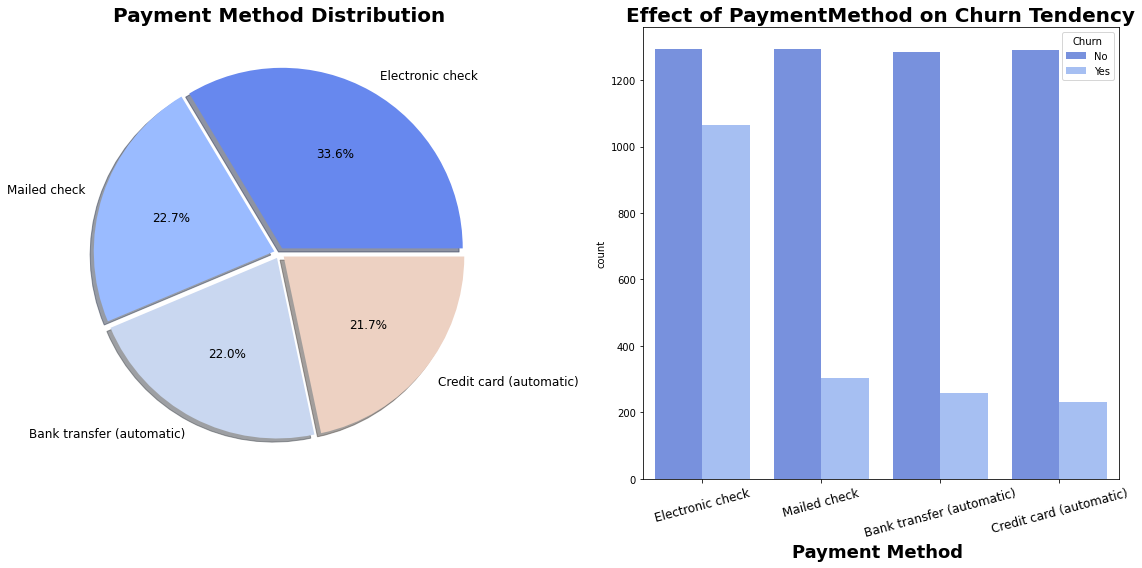

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

**We can see high Attrition tendency in customer who pay by Electronic check.**

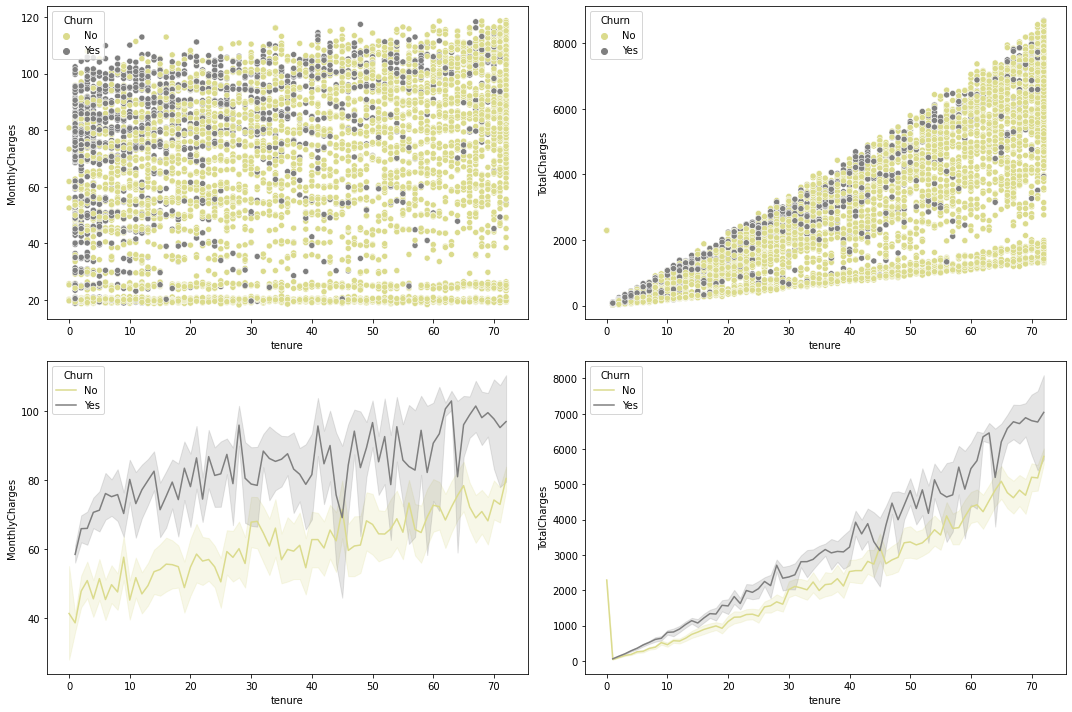

In [38]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

#### Observation:

- High Monthly Charges in customer who choose churn compare to rest.

- Same goes with High Total Charges in customer who choose churn compare to rest.

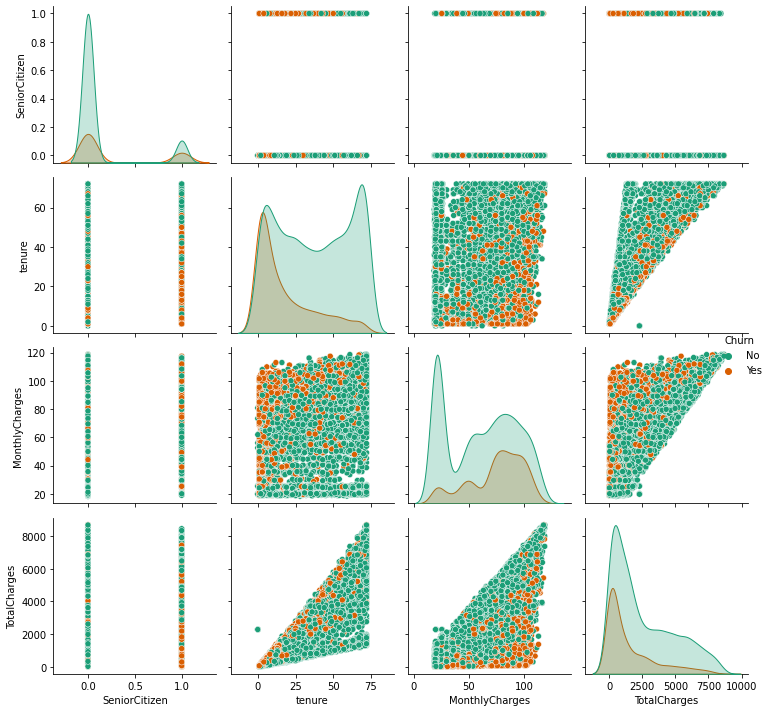

In [39]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [40]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [41]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [43]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [44]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature selection and Engineering

## Outliers Detection and Removal

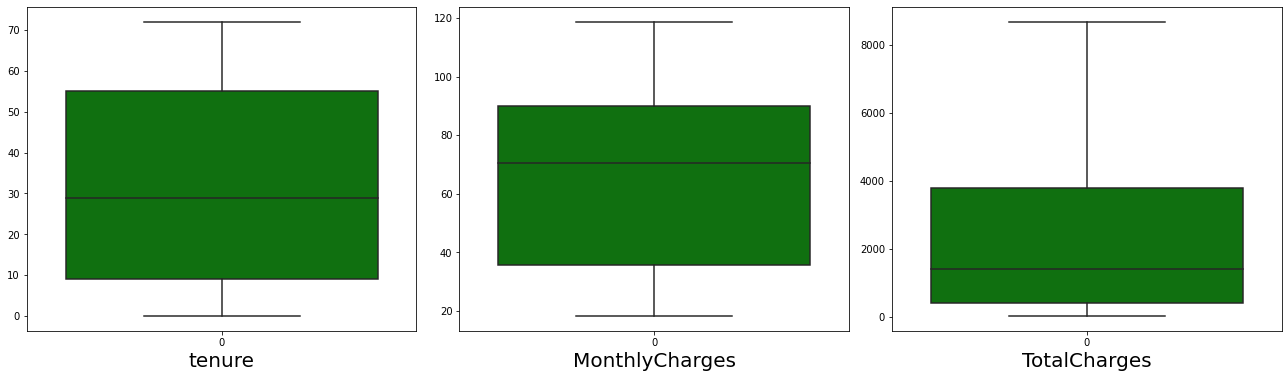

In [45]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see No outliers exist dataset.</b>

### Outliers removal using Zscore method

In [46]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassign the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [47]:
df.drop(['PhoneService'],axis=1,inplace=True)

## Skewness of features

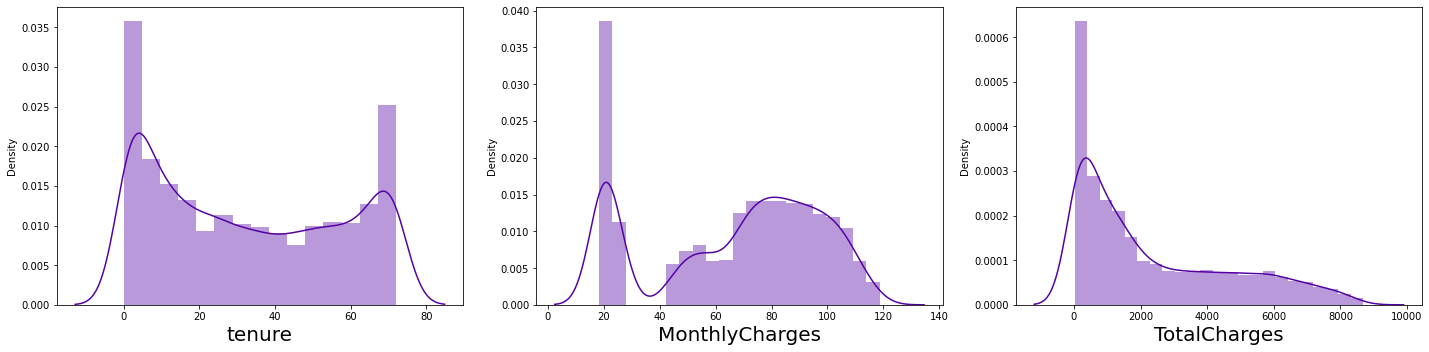

In [48]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data.**

**There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

In [49]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

**'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.** 

**Out of which TotalCharges is skewed in nature. Which we gone transform here.**

In [50]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

## Corrleation 

In [51]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


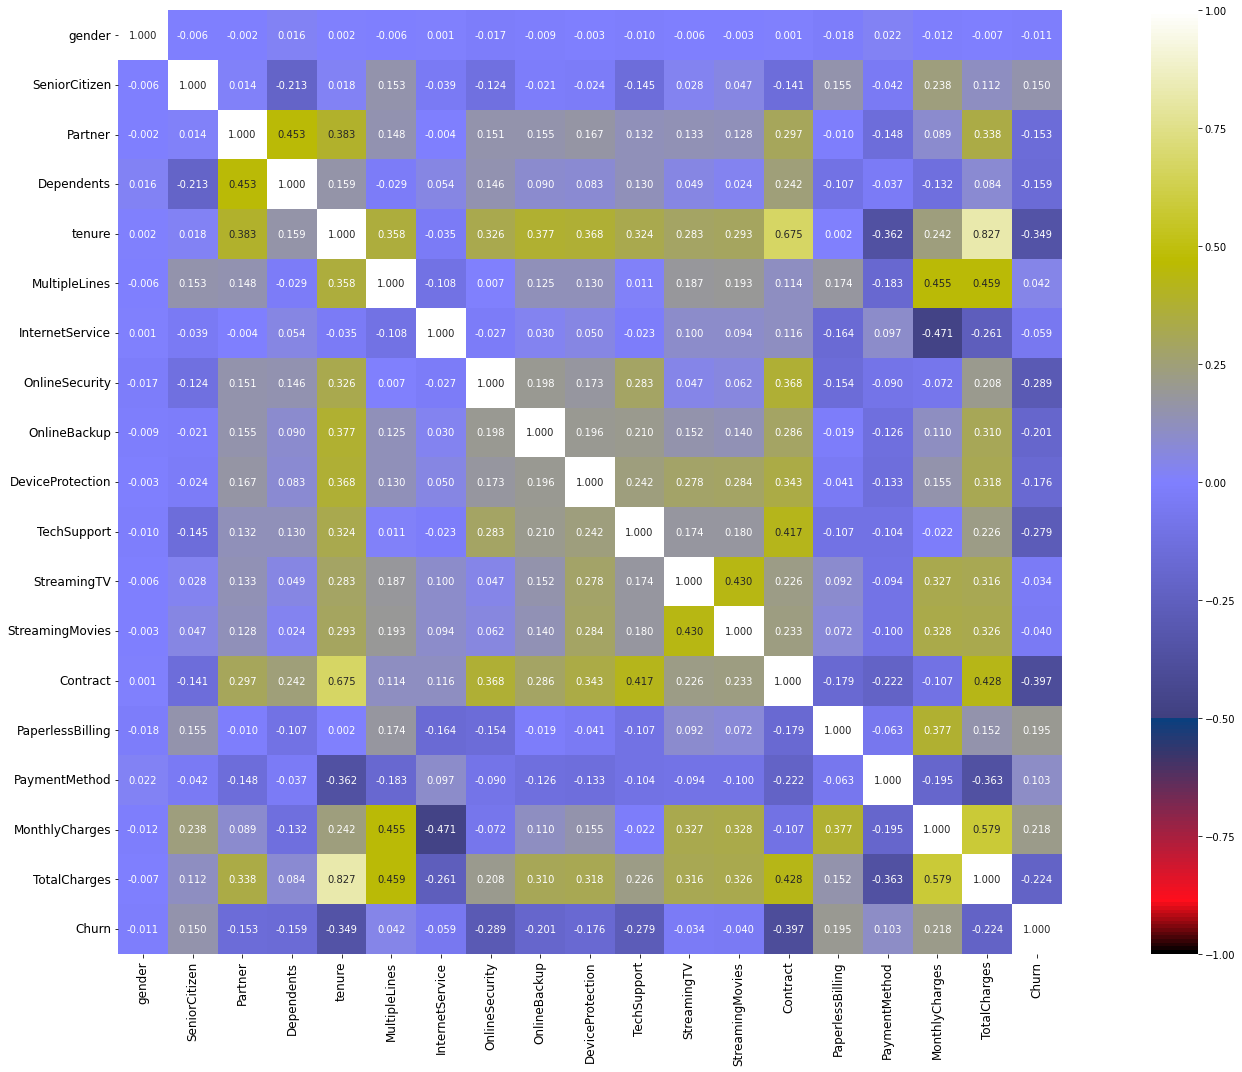

In [52]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

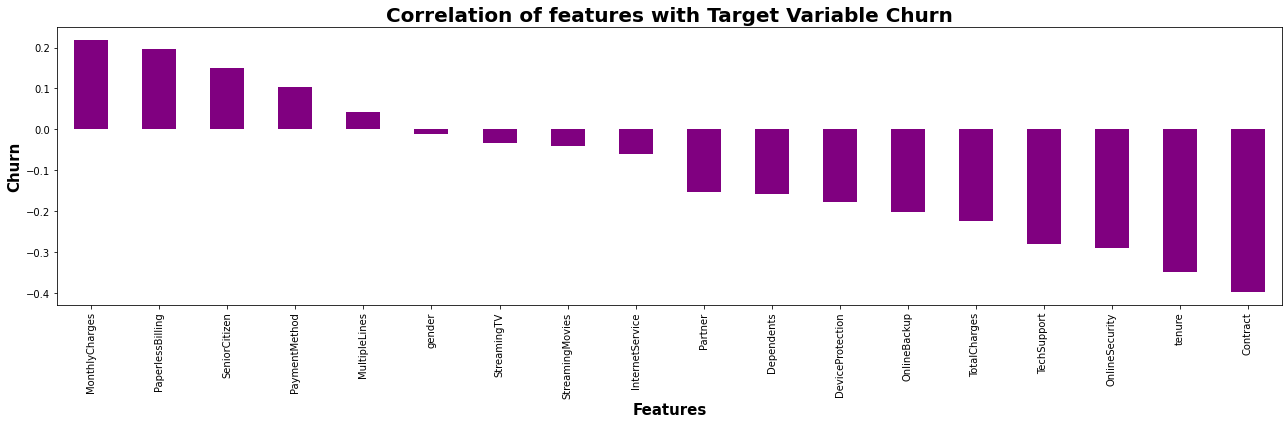

In [53]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

## Balance Imbalanced target feature

In [54]:
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

<b> As Target variable data is Imbalanced in nature we will need to balance target variable.</b>

### Balance using SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [57]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [58]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

<b><em> We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.</em></b>

## Standard Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

 ## Checking Multicollinearity between features using variance_inflation_factor

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.014077,gender
1,1.097718,SeniorCitizen
2,1.540163,Partner
3,1.432552,Dependents
4,6.590335,tenure
5,1.431643,MultipleLines
6,1.470558,InternetService
7,1.352769,OnlineSecurity
8,1.250270,OnlineBackup
9,1.309229,DeviceProtection


**Independent feature VIF is within permissible limit of 10**

## PCA

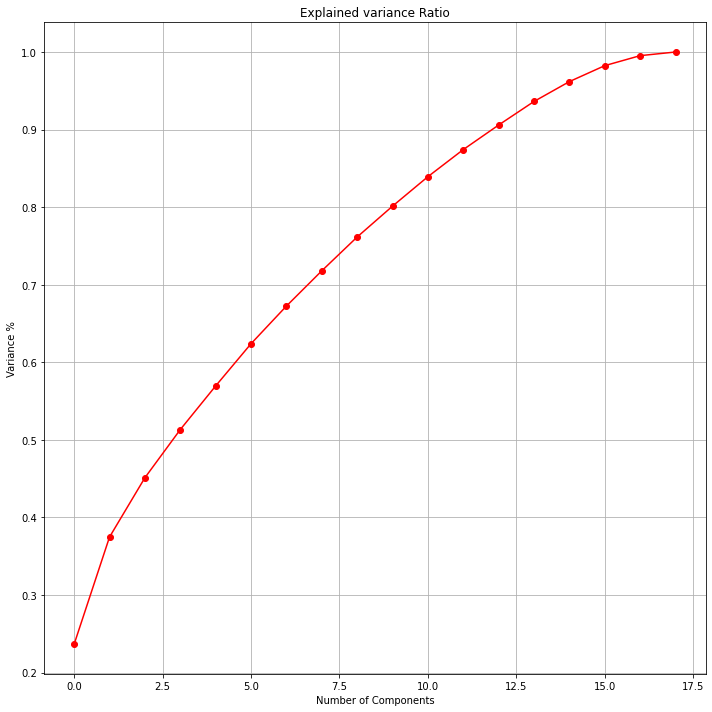

In [61]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observation -
<b> AS per the graph, we can see that 13 principal components attribute for 90% of variation in the data.  We shall pick the first 13 components for our prediction. </b>

In [62]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [63]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

In [64]:
features =principle_x
target = Y

In [65]:
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.499760,1.385698,1.146139,1.305622,1.345341,-1.603987,0.638106,1.332944,-0.545500,-0.165607,-1.497301,-1.621030,-1.175257
1,-2.247416,0.833626,1.238998,0.659793,1.169090,-1.472974,1.441257,-1.927165,-0.595018,0.304058,0.325131,-1.524559,0.186781
2,-3.036368,-0.313068,0.417098,0.242718,-0.720206,0.353423,0.067091,-0.602604,0.474863,-0.257394,-0.335000,0.041647,-0.522626
3,-0.248878,-2.198137,-1.898188,0.260361,-1.304575,-0.403491,-0.000667,0.482086,-0.187522,-0.204000,-1.162658,-0.371712,0.327474
4,0.217147,-0.992707,0.502910,-1.339499,-0.187643,-0.629158,-1.135296,-1.756342,-1.100755,0.576423,0.650801,0.021266,0.924819


# Machine Learning Model Building

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  

# Find best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Data Frame random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Data Frame random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
24,633,78.543598,78.452445,-0.091153
28,735,78.530163,78.452445,-0.077718
12,386,78.530163,78.452445,-0.077718
2,105,78.624211,78.559914,-0.064297
19,513,78.516727,78.452445,-0.064282
29,792,78.718259,78.667383,-0.050876
3,147,78.610775,78.559914,-0.050861
20,519,78.503292,78.452445,-0.050847
14,423,78.449550,78.398710,-0.050840
10,350,78.449550,78.398710,-0.050840


In [67]:
# Ideal random state where training accuracy == testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
randomstate=np.array(RSN)[0]
randomstate

633

In [68]:
# using ideal random state---> split the data
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=randomstate)

In [69]:
# Train  model ---> check accuracy score with one best random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))
print(classification_report(y_test,pred_test)) 
print(confusion_matrix(y_test,pred_test))

0.784524449220849
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       942
           1       0.76      0.82      0.79       919

    accuracy                           0.78      1861
   macro avg       0.79      0.78      0.78      1861
weighted avg       0.79      0.78      0.78      1861

[[709 233]
 [168 751]]


# Cross Validation for Logistic Regression

In [70]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Get optimized folds from Logistic Regression where --> cross validation score == model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,features,target,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation DataFrame with mulitFolds")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation DataFrame with mulitFolds


,No of Folds,Cross Validation Score,Model Score,Difference
8,10,78.225587,78.452445,0.002269
7,9,78.171418,78.452445,0.002810
6,8,78.084695,78.452445,0.003678
5,7,78.063467,78.452445,0.003890
4,6,77.891752,78.452445,0.005607
3,5,77.794855,78.452445,0.006576
2,4,77.719261,78.452445,0.007332
1,3,77.117910,78.452445,0.013345
0,2,76.848667,78.452445,0.016038


In [71]:
# Get the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
print("Best CV:",BCV)
# Use best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,features,target,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

Best CV: 10
The CV score is: 78.22558700899715 
The accuracy score is: 78.4524449220849
Difference is: 0.002268579130877413


# Few Other Classification Algorithms

In [72]:
from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.linear_model import SGDClassifier           # SGDClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier
from sklearn.ensemble import VotingClassifier            # VotingClassifier

estimator=[]
estimator.append(('KNC',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

# Define the list with all Algorithms
models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
       ('SGDClassifier()',SGDClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier())]

#empty lists
AccuracyScore=[]
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

# Loop for all algorithms -->train the model & --->for cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Append "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            #"classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],features,target,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Add"cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Add "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Add "Model" to the list
    

# Need dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sort with difference

Model: GaussianNB()
Accuracy Score:
78.3987103707684
Confusion Matrix:
[[756 186]
 [216 703]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       942
           1       0.79      0.76      0.78       919

    accuracy                           0.78      1861
   macro avg       0.78      0.78      0.78      1861
weighted avg       0.78      0.78      0.78      1861

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
74.74476088124663
Confusion Matrix:
[[693 249]
 [221 698]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       942
           1       0.74      0.76      0.75       919

    accuracy                           0.75      1861
   macro avg       0.75      0.75      0.75      1861
weighted avg       0.75      0.75      0.75      1861

------------------------------------

,Model,Model Score,Cross Validation Score,Difference
4,SVC(),79.849543,79.731321,0.001182
6,ExtraTreesClassifier(),80.655562,80.871453,0.002159
0,LogisticRegression(),78.452445,78.225587,0.002269
8,AdaBoostClassifier(),78.828587,78.526997,0.003016
3,SGDClassifier(),77.431488,76.946537,0.004850
5,RandomForestClassifier(),80.333154,81.118557,0.007854
7,GradientBoostingClassifier(),80.225685,79.386808,0.008389
2,Decision Tree Classifier(),74.744761,75.872862,0.011281
1,GaussianNB(),78.398710,77.269914,0.011288


Considering RandomForestClassifier() based on Model Score & CV Score

We will consider for Hyper Paramter Tuning with Random Forest Classifier aswell

# Hyper Parameter Tuning

In [73]:
# Hyper parameter tuning on RandomForestClassifier()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {  'bootstrap': [True], 
             'max_depth': [5,50], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5,10]
            }

GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=BCV)
GCV.fit(x_train, y_train)
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 10}

In [74]:
# RandomForestClassifier with best parameters
GBC = RandomForestClassifier(bootstrap=GCV.best_params_['bootstrap'],criterion=GCV.best_params_['criterion'],
                                 max_depth=GCV.best_params_['max_depth'],max_features=GCV.best_params_['max_features'],
                                 n_estimators=GCV.best_params_['n_estimators'])     
                                     

GBC.fit(x_train, y_train)
Y_prediction = GBC.predict(x_test)
GBC_score = GBC.score(x_train, y_train)
print("GBC_score:", round(GBC_score, 4)*100, "%")

pred=GBC.predict(x_test)
acc=accuracy_score(y_test,pred)
print("Accuracy score--> \n",acc*100)
print()
print("ConfusionMatrix--> \n",confusion_matrix(y_test,pred))
print()
print("classification_report--> \n",classification_report(y_test,pred))

score=cross_val_score(GBC,features,target,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print()
print("Difference of Accuracy & CV is:",accuracy_score(y_test,pred)-score)

GBC_score: 98.63 %
Accuracy score--> 
 79.09725953788286

ConfusionMatrix--> 
 [[774 168]
 [221 698]]

classification_report--> 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       942
           1       0.81      0.76      0.78       919

    accuracy                           0.79      1861
   macro avg       0.79      0.79      0.79      1861
weighted avg       0.79      0.79      0.79      1861

The CV score is: 79.5922987191481 
The accuracy score is: 79.09725953788286

Difference of Accuracy & CV is: -0.004950391812652444


## Observations:

Hyper Parameter Tuned model: The difference between Cross Validation Score and model score is 0.004

Model with default parameters: The difference between Cross Validation Score and model score is 0.000988

As difference is less in the model with default parameters .

We will consider the RandomForestClassifier with default parameters

AUC ROC Curve AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve--->is a performance measurement for the classification problems.ROC --> probability curve AUC---> represents the degree or measure of separability,Also provided how much the model is capable of distinguishing between classes.

Higher the AUC--> the better the model is at predictions The model with higher AUC is the best model.

Plotting AUC ROC Curve helps in comparing the performance among multiple models.

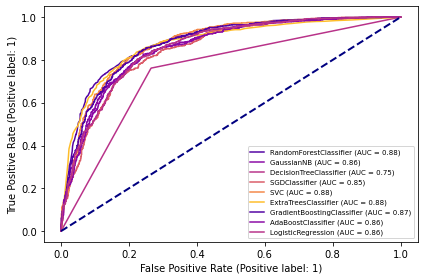

In [75]:
# AUC ROC Curve to compare the multiple models
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

#  Plot  AUC ROC curve for RandomForestClassifier
disp=plot_roc_curve(models[4][1],x_test,y_test)  

# Plot  AUC ROC curve for other models with same axis == RandomForestClassifier
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[1][1],x_test,y_test,ax=disp.ax_) 
plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

In [76]:
#Print Prediction for one input using GradientBoostingClassifier model
predict_this = [[-0.516760,1.396209,1.159745,1.246034,0.905359,-1.747385,0.539092,1.390598,0.778939,-0.179925,-1.575248,-1.526088,-1.276828]]

if models[4][1].predict(predict_this) == 1:
    print("Customer Chruned.")
else:
    print("Customer NOT Chruned.")

Customer NOT Chruned.


# Saving the Model

In [77]:
import joblib
Final_mod = models[4][1]
print(Final_mod)
joblib.dump(Final_mod,'Customer_Churn_Final.pkl')

RandomForestClassifier()


['Customer_Churn_Final.pkl']

# Predicting the Final Model

In [78]:
# Prediction
prediction = Final_mod.predict(x_test)
y_pred=Final_mod.predict(x_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8033315421816228


In [79]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,1
2,0,1
3,1,1
4,0,0
